
# Week 7 asignment
For the following task you will need to use the website: https://www.dba.dk/

1. Create a BeautifulSoup Object from the link given above
2. Find all the "Kategorier"
3. Find all the links
4. Use selenium to press the "Kategory" link with the name "biler"
5. In the category "biler" theres a list with cities to see where the sales of cars is located. Make a bar plot from lowest to highest showing the amount of car sale in each city.

In [1]:
#1)

import bs4
import requests


r = requests.get('https://www.dba.dk', headers={'User-Agent': 'Mozilla/5.0'})
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')


In [9]:
#2)

res = soup.select('.taxonomy-navigation > li.single > a')

for r in res:
    print(r.get('title'))

Biler
Camping
Biltilbehør
Boliger
Have og byg
Til boligen
Til børn
Tøj og mode
Sport og fritid
Både
Cykler
Hobby
Computer og spillekonsoller
Mobil og telefoni
Dyr
Billede og lyd
Musikinstrumenter
Motorcykler og tilbehør
Scootere og knallerter
Diverse
Erhverv
Job
Ferie
Billetter
Bøger og blade
None


In [139]:
#3)
for link in soup.find_all('a'):
    if not str(link.get('href')).startswith('https'):
        continue
    print(link.get('href'))

https://www.dba.dk/
https://guide.dba.dk
https://support.dba.dk/
https://www.dba.dk/
https://www.dba.dk/biler/reg-koebenhavn-og-omegn/
https://www.dba.dk/biler/reg-aarhus/
https://www.dba.dk/biler/reg-odense/
https://www.dba.dk/biler/reg-aalborg/
https://www.dba.dk/biler/reg-sjaelland/
https://www.dba.dk/biler/reg-jylland/
https://www.dba.dk/biler/reg-fyn/
https://www.dba.dk/biler/reg-bornholm/
https://www.dba.dk/biler/reg-groenland/
https://info.dba.dk/biler/vaerkstedsservice
https://support.dba.dk/
https://info.dba.dk/kontakt/
https://jobs.ebayclassifiedsgroup.com/dba
https://dba.presscloud.com/nr/#/
https://guide.dba.dk
https://sikkerhed.dba.dk/
https://info.dba.dk/vilkaar/brugervilkaar
https://info.dba.dk/vilkaar/annonceringsregler
https://info.dba.dk/vilkaar/persondatapolitik
https://boost.dba.dk
https://www.bilbasen.dk
https://www.dba.dk/
https://da-dk.facebook.com/dba.dk
https://twitter.com/dba_dk


In [ ]:
#4) Use selenium to press the "Kategory" link with the name "biler"
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True
browser = webdriver.Firefox(options=options)

browser.get('https://www.dba.dk/%27')
browser.implicitly_wait(3)

link_to_persons = browser.find_elements_by_link_text('Biler')
link_to_persons[0].click()
print(type(link_to_persons))


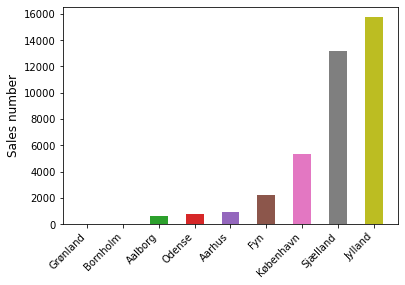

In [146]:
#5) In the category "biler" theres a list with cities to see where the sales of cars is located. 
#   Make a bar plot from lowest to highest showing the amount of car sale in each city.
import matplotlib.pyplot as plt

r2 = requests.get('https://www.dba.dk/biler', headers={'User-Agent': 'Mozilla/5.0'})
r2.raise_for_status()
soup = bs4.BeautifulSoup(r2.text, 'html.parser')
city_sales = soup.select('nav.row-fluid > ul > li > a ')

c_s_dict = {}                         
                         
for x in city_sales:
    sales = int(x.text.split(" ")[-1].split("(")[1].split(")")[0])
    city = x.text.split(" ")[0]
    c_s_dict.update({city: sales})

sortedDict = {k: v for k, v in sorted(c_s_dict.items(), key=lambda item: item[1])}

for n in sortedDict:
    plt.bar([n], [sortedDict.get(n)], width=0.5, align="center")
    plt.xticks(rotation=45, horizontalalignment="right", fontweight="light")
    plt.ylabel("Sales number", fontsize=12)
    
  
